# **Exploration01 인공지능과 가위바위보 하기**

### **01 데이터 준비 및 확인**

인공지능과 가위바위보를 하기 위해서는 가위, 바위, 보 사진이 필요하기 때문에 다음 두 가지 사전 작업을 진행해 줍니다. 먼저, [teachable machine 사이트](https://teachablemachine.withgoogle.com/)를 이용해 가위, 바위, 보 사진을 각 100장씩 총 300장 생성합니다. 그리고 나서 사진을 28×28로 사이즈로 변경해줍니다.

In [18]:
#데이터 준비

from PIL import Image
import os, glob
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수는 각 100개씩 총 300개입니다.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor100/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock100/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper100/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  1


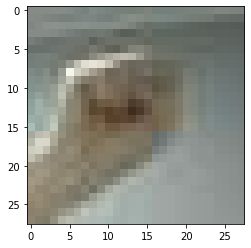

In [19]:
# 데이터 확인

import matplotlib.pyplot as plt
plt.imshow(x_train[101])
print('라벨: ', y_train[101])

### **02 모델 설계**

**- 입력부**

위에서 x_trian shape을 확인해보니 (28, 28, 3)이었습니다.
따라서 model의 첫 layer 입력부의 input_shape은 (28, 28, 3)됩니다.
MNIST 숫자 손글씨 데이터셋은 흑백 이미지 데이터로 shape이 (28, 28, 1)이었지만, 가위바위보 이미지는 컬러 데이터이기 때문에 shape이 (28, 28, 3)인 것입니다.

**- 출력부**

숫자는 0-9까지 10가지로 분류해야하지만 가위바위보는 3가지로 분류하므로, modle의 마지막 layer 출력부를 3으로 해야합니다.

In [20]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=16
n_channel_2=32
n_dense=32

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

### **03 모델 학습**

모델을 학습 시킬때 x_trian을 정규화한 x_train_norm을 사용해야합니다.

In [21]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 4s 270ms/step - loss: 1.0900 - accuracy: 0.4118
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0499 - accuracy: 0.4524
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9765 - accuracy: 0.7174
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8405 - accuracy: 0.8451
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7165 - accuracy: 0.7505
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5495 - accuracy: 0.8655
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5405 - accuracy: 0.7196
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6339 - accuracy: 0.6512
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4303 - accuracy: 0.7952
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3726 - accuracy: 0.8920


epoch 10을 했을 때 loss는 **0.3726**, accuracy는 **0.8920**로 모델이 학습하였습니다.

### **04 모델 평가**

기존의 300개 데이터를 분할하여 학습셋과 평가셋을 마련한 것이 아니기에, 추가로 평가할 데이터를 test 폴더에 업로드하고 평가셋을 만들야 합니다. 평가셋을 만드는 방법은 학습셋을 만드는 방법과 크게 다르지 않습니다.

In [31]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [32]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 2.8732 - accuracy: 0.3500
test_loss: 2.873175859451294 
test_accuracy: 0.3499999940395355


test accuracy(**0.34**)가 train accuracy(**0.89**) 보다 상당히 낮게 나왔습니다. 모델을 개선하여 성능을 향상시켜야 되겠습니다. 향상시키는 방향은 다음 3가지로 해보고자합니다.   

첫째, 하이퍼 파라미터 변경   
둘째, 모델 layer 개수 변경   
셋째, 데이터 양 늘리기

### **05 모델 향상(1) - 하이퍼파라미터 변경**

In [33]:
# n_channel_1을 32로 변경

n_channel_1=32
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0887 - accuracy: 0.4002
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0554 - accuracy: 0.5633
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0056 - accuracy: 0.5196
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9662 - accuracy: 0.5216
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8881 - accuracy: 0.7052
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7611 - accuracy: 0.7330
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6309 - accuracy: 0.7413
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6210 - accuracy: 0.7224
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5755 - accuracy: 0.7076
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4445 - accuracy: 0.8468
10/10 - 0s - loss: 

n_channel_1을 32로 변경하니 test_accuracy가 **0.34**에서 **0.36**으로 소폭 높아졌습니다.

In [38]:
# n_dense를 64로 변경

n_channel_1=32
n_channel_2=32
n_dense=64
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0995 - accuracy: 0.3497
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0859 - accuracy: 0.4368
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0392 - accuracy: 0.4969
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9703 - accuracy: 0.7617
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8803 - accuracy: 0.6402
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7738 - accuracy: 0.6474
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6408 - accuracy: 0.7958
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5997 - accuracy: 0.7440
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4874 - accuracy: 0.8554
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4877 - accuracy: 0.7826
10/10 - 0s - loss: 

n_dense를 64로 변경하니 test_accuracy가 **0.36**에서 **0.34**으로 다시 낮아졌습니다.

In [50]:
# n_dense를 초기값 32로 변경, n_train_epoch을 20으로 변경

n_channel_1=32
n_channel_2=32
n_dense=32
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/20
10/10 [==============================] - 0s 3ms/step - loss: 1.0977 - accuracy: 0.3105
Epoch 2/20
10/10 [==============================] - 0s 3ms/step - loss: 1.0712 - accuracy: 0.4841
Epoch 3/20
10/10 [==============================] - 0s 3ms/step - loss: 1.0166 - accuracy: 0.8066
Epoch 4/20
10/10 [==============================] - 0s 3ms/step - loss: 0.9428 - accuracy: 0.6901
Epoch 5/20
10/10 [==============================] - 0s 3ms/step - loss: 0.8587 - accuracy: 0.6171
Epoch 6/20
10/10 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.7553
Epoch 7/20
10/10 [==============================] - 0s 3ms/step - loss: 0.7294 - accuracy: 0.7217
Epoch 8/20
10/10 [==============================] - 0s 3ms/step - loss: 0.6198 - accuracy: 0.7541
Epoch 9/20
10/10 [==============================] - 0s 3ms/step - loss: 0.5008 - accuracy: 0.7804
Epoch 10/20
10/10 [==============================] - 0s 3ms/step - loss: 0.4641 - accuracy: 0.7755
Epoch 11/20
10/10 [

n_train_epoch을 20으로 변경해도 test_accuracy는 **0.34**으로 차이가 없습니다.

n_train_epoch을 8, 12, 16 등으로 바꾸어도 비슷한 결과가 나왓습니다.

지금 모델에서는 하이퍼파라미터 조정으로 test_accuracy 값에 상승을 기대하기 어려운 것 같습니다.

### **06 모델 향상(2) - 모델 layer 개수 변경**

이번에는 모델 layer 개수를 변경해보려고합니다. layer를 줄여도보고, 늘려도 보겠습니다.

In [53]:
# 모델 layer 7개에서 5개로 감소

n_channel_1=16
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1150 - accuracy: 0.2631
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0564 - accuracy: 0.5276
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9968 - accuracy: 0.6406
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9058 - accuracy: 0.7026
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8266 - accuracy: 0.6971
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6653 - accuracy: 0.8167
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5620 - accuracy: 0.7585
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4906 - accuracy: 0.8042
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4471 - accuracy: 0.8709
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4637 - accuracy: 0.8264
10/10 - 0s - loss: 

In [54]:
# 모델 layer 7개에서 9개로 증가

n_channel_1=16
n_channel_2=32
n_channel_3=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/10
10/10 [==============================] - 5s 236ms/step - loss: 1.0971 - accuracy: 0.3370
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0850 - accuracy: 0.4416
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0729 - accuracy: 0.4639
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0517 - accuracy: 0.4754
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0096 - accuracy: 0.4462
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9224 - accuracy: 0.6578
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7973 - accuracy: 0.6867
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6636 - accuracy: 0.7142
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5381 - accuracy: 0.7843
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4682 - accuracy: 0.8013
10/10 - 0s - loss

모델의 layer를 5개로 줄여보고, 9개로 늘려봐도 여전히 test_accuracy는 큰 차이가 없습니다.

### **07 모델 향상(3) - 데이터 양 늘리기**

먼저 데이터의 양을 10배 늘리기 위해 가위, 바위, 보 사진을 각각 1000개씩 준비합니다. 총 3000개의 사진이 준비되었습니다. 이번에는 데이터가 많기 때문에 fundamentals 10. 가랏, 몬스터볼!에서 배운 sklearn의 데이터분할을 이용해 학습셋과 평가셋을 구분해보겠습니다.

In [74]:
# 데이터분할

def load_data2(img_path, number_of_data=3000):
    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor1000/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock1000/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper1000/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("총 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(X2, y2)=load_data2(image_dir_path)
X2_norm = X2/255.0   # 입력은 0~1 사이의 값으로 정규화
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_norm, y2, test_size=0.2, random_state=15)


print("X_train shape: {}".format(X2_train.shape))
print("y_train shape: {}".format(y2_train.shape))
print("X_test shape: {}".format(X2_test.shape))
print("y_test shape: {}".format(y2_test.shape))

총 이미지 개수는 3000 입니다.
X_train shape: (2400, 28, 28, 3)
y_train shape: (2400,)
X_test shape: (600, 28, 28, 3)
y_test shape: (600,)


라벨:  2


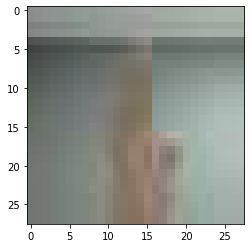

In [75]:
# 데이터 확인

import matplotlib.pyplot as plt
plt.imshow(X2_train[2399])
print('라벨: ', y2_train[2399])

In [68]:
# 모델설계 - 모델은 처음 모델을 사용합니다.

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X2_train, y2_train, epochs=n_train_epoch)

test_loss, test_accuracy = model.evaluate(X2_test,y2_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/10
75/75 [==============================] - 1s 3ms/step - loss: 1.1121 - accuracy: 0.3503
Epoch 2/10
75/75 [==============================] - 0s 3ms/step - loss: 1.0866 - accuracy: 0.4404
Epoch 3/10
75/75 [==============================] - 0s 3ms/step - loss: 1.0308 - accuracy: 0.5051
Epoch 4/10
75/75 [==============================] - 0s 3ms/step - loss: 0.8300 - accuracy: 0.6255
Epoch 5/10
75/75 [==============================] - 0s 3ms/step - loss: 0.6268 - accuracy: 0.7864
Epoch 6/10
75/75 [==============================] - 0s 3ms/step - loss: 0.4291 - accuracy: 0.8771
Epoch 7/10
75/75 [==============================] - 0s 3ms/step - loss: 0.3431 - accuracy: 0.8861
Epoch 8/10
75/75 [==============================] - 0s 3ms/step - loss: 0.2227 - accuracy: 0.9644
Epoch 9/10
75/75 [==============================] - 0s 3ms/step - loss: 0.1748 - accuracy: 0.9622
Epoch 10/10
75/75 [==============================] - 0s 3ms/step - loss: 0.1180 - accuracy: 0.9822
19/19 - 2s - loss: 

test_accuracyrk **0.981**로 대폭 상승하였습니다.

이번에는 대전 2기 분들이 각자 촬영하고 공유한 가위, 바위, 보 사진을 모두 모아 데이터로 준비합니다. 가위는 2420개, 바위는 2302개, 보는 2370개가 모여 총 7092개입니다. 처음 300개 데이터 보다 약 23배 데이터가 증가하였습니다.

In [76]:
# 데이터분할

import numpy as np
from sklearn.model_selection import train_test_split

def load_data3(img_path, number_of_data=7092):
    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor2420/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock2302/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper2370/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("총 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(X3, y3)=load_data3(image_dir_path)
X3_norm = X3/255.0   # 입력은 0~1 사이의 값으로 정규화
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_norm, y3, test_size=0.2, random_state=15)


print("X_train shape: {}".format(X3_train.shape))
print("y_train shape: {}".format(y3_train.shape))
print("X_test shape: {}".format(X3_test.shape))
print("y_test shape: {}".format(y3_test.shape))

총 이미지 개수는 7092 입니다.
X_train shape: (5673, 28, 28, 3)
y_train shape: (5673,)
X_test shape: (1419, 28, 28, 3)
y_test shape: (1419,)


라벨:  1


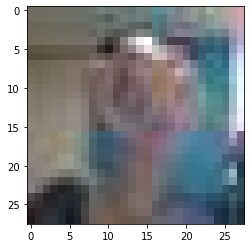

In [77]:
# 데이터 확인

import matplotlib.pyplot as plt
plt.imshow(X3_train[5672])
print('라벨: ', y3_train[5672])

In [78]:
# 모델설계 - 모델은 개선전 처음 모델을 사용해 봅시다.

model.fit(X3_train, y3_train, epochs=n_train_epoch)

test_loss, test_accuracy = model.evaluate(X3_test,y3_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/10
178/178 [==============================] - 1s 3ms/step - loss: 0.1031 - accuracy: 0.9679
Epoch 2/10
178/178 [==============================] - 1s 3ms/step - loss: 0.0813 - accuracy: 0.9774
Epoch 3/10
178/178 [==============================] - 1s 3ms/step - loss: 0.0739 - accuracy: 0.9796
Epoch 4/10
178/178 [==============================] - 1s 3ms/step - loss: 0.0679 - accuracy: 0.9803
Epoch 5/10
178/178 [==============================] - 1s 3ms/step - loss: 0.0595 - accuracy: 0.9848
Epoch 6/10
178/178 [==============================] - 1s 3ms/step - loss: 0.0531 - accuracy: 0.9838
Epoch 7/10
178/178 [==============================] - 1s 3ms/step - loss: 0.0409 - accuracy: 0.9896
Epoch 8/10
178/178 [==============================] - 1s 3ms/step - loss: 0.0375 - accuracy: 0.9907
Epoch 9/10
178/178 [==============================] - 1s 3ms/step - loss: 0.0323 - accuracy: 0.9919
Epoch 10/10
178/178 [==============================] - 1s 3ms/step - loss: 0.0306 - accuracy: 0.9929

test_accuracy가 **0.984**로 조금 더 상승하였습니다.

데이터의 양을 늘리니, 학습데이터를 300개만 사용했던 초기 모델의 test accuracy(**0.34**) 보다 상당히 높게 나왔습니다.

### **08 정리 및 회고**

- 지금까지 모델을 개선시키기 위한 순서를 정리하면 다음과 같습니다.

1. **하이퍼파라미터 변경**   
    1) n_channel_1=32/n_channel_2=32/n_dense=32/n_train_epoch=10 : **0.363**           
    2) n_channel_1=32/n_channel_2=32/n_dense=64/n_train_epoch=10 : **0.349**           
    3) n_channel_1=32/n_channel_2=32/n_dense=32/n_train_epoch=20 : **0.346**
      
      
2. **모델 layer 변경**   
    1) layer 7개 -> 5개 축소 : **0.316**   
    2) layer 7개 -> 9개 확대 : **0.346**
        
        
3. **데이터 양 증가**   
    1) 데이터 3000개(데이터 분할) : **0.981**   
    2) 데이터 7092개(데이터 분할) : **0.984**


- 모델을 개선시키기 위한 방법으로 하이퍼파라미터를 조정하고 모델의 layer 수를 변경하는 방법은 크게 효과를 보지 못했습니다. 하지만 학습 데이터의 양을 많이 늘리니 test accuracy가 상당히 향상되었습니다. 따라서, 모델을 설계하고 조정하기에 앞서 학습 데이터가 충분한지를 먼저 살피는 것이 중요하다는 것을 알게되었습니다.


- 인간의 학습도 많은 양을 반복 숙달 하다보면 어느새 질적인 성장이 이루어지듯, 인공지능 모델도 그러한가 봅니다. :D
